<img src='https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcQ-VfNtOyJbsaxu43Kztf_cv1mgBG6ZIQZEVw&usqp=CAU'>

# Procesamiento de Lenguaje Natural

## Taller #7: Clasificación de textos
`Fecha de entrega: Abril 22, 2021. (Antes del inicio de la próxima clase).`

`Modo de entrega: Subir link de GitHub al aula virtual.`

In [3]:
pip install plotly
pip install --upgrade scikit-learn

  Created wheel for retrying: filename=retrying-1.3.3-py3-none-any.whl size=11429 sha256=1a0679c907a0f7da726587972ff886fe7a30a6e1adf7d82ce0c0848f72cf6d17
  Stored in directory: c:\users\xboxl\appdata\local\pip\cache\wheels\f9\8d\8d\f6af3f7f9eea3553bc2fe6d53e4b287dad18b06a861ac56ddf
Successfully built retrying
Note: you may need to restart the kernel to use updated packages.


In [1]:
import re
import json
import pandas as pd

from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import confusion_matrix, classification_report

import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix

import matplotlib.pyplot as plt
import plotly.graph_objs as go
from plotly.offline import iplot

In [2]:
# Cargar datos
path = 'C:/Users/XboxL/Documents/01 - Maestria En Analitica de Datos/02 - Procesamiento de Lenguaje Natural (NLP) - Clase/Recursos/reviews_vidjew_es.csv'
data = pd.read_csv(path,encoding="utf-8")
print(f'Dimensiones del archivo: {data.shape}')
data.head()

Dimensiones del archivo: (1000, 8)


,review_id,product_id,reviewer_id,stars,review_body,review_title,language,product_category
0,es_0825565,product_es_0370490,reviewer_es_0174781,3,"Buen. Buena calidad, y buena presentación.",Contenta,es,jewelry
1,es_0227934,product_es_0354224,reviewer_es_0411613,3,"Un producto a perfecto, para salir de casa con...",Versatilidad,es,video_games
2,es_0468601,product_es_0665460,reviewer_es_0348315,1,No funciona con Nintendo Switch. No hay forma ...,Decepción absoluta,es,video_games
3,es_0814494,product_es_0692692,reviewer_es_0951508,5,"Recomendado, los utilizo para pc y no me dan n...",Auriculares Pecham ps4,es,video_games
4,es_0206329,product_es_0728826,reviewer_es_0493255,4,El cable funciona bien podria ser un poco mas ...,Perfecto,es,video_games


In [3]:
columnasEliminar = ["review_id","product_id","reviewer_id"]
data = data.drop(columnasEliminar,axis=1)
print(f'Dimensiones del archivo: {data.shape}')
data.head()

Dimensiones del archivo: (1000, 5)


,stars,review_body,review_title,language,product_category
0,3,"Buen. Buena calidad, y buena presentación.",Contenta,es,jewelry
1,3,"Un producto a perfecto, para salir de casa con...",Versatilidad,es,video_games
2,1,No funciona con Nintendo Switch. No hay forma ...,Decepción absoluta,es,video_games
3,5,"Recomendado, los utilizo para pc y no me dan n...",Auriculares Pecham ps4,es,video_games
4,4,El cable funciona bien podria ser un poco mas ...,Perfecto,es,video_games


### `[8 pts]` Punto 1: Dividir el conjunto de datos en entrenamiento y prueba

In [4]:
print(f'-- Balanceo de Stars: {data.stars.value_counts(normalize=True)}')
print(f'-- Balanceo de Language: {data.language.value_counts(normalize=True)}')
print(f'-- Balanceo de Product Category: {data.product_category.value_counts(normalize=True)}')

-- Balanceo de Stars: 5    0.233
1    0.220
3    0.201
4    0.176
2    0.170
Name: stars, dtype: float64
-- Balanceo de Language: es    1.0
Name: language, dtype: float64
-- Balanceo de Product Category: jewelry        0.502
video_games    0.498
Name: product_category, dtype: float64


In [5]:
train, test = train_test_split(data, test_size=0.2, random_state=100)

print(f"Tenemos {data.shape[0]} datos en total.")
print(f"El conjunto de datos de entrenamiento (train) tiene {train.shape[0]} datos.")
print(f"El conjunto de datos de prueba (test) tiene {test.shape[0]} datos.")

Tenemos 1000 datos en total.
El conjunto de datos de entrenamiento (train) tiene 800 datos.
El conjunto de datos de prueba (test) tiene 200 datos.


###  `[8 pts]` Punto 2: Hacer pre-procesamiento del texto

In [6]:
def pre_procesado(texto):
    from nltk.corpus import stopwords
    stopwords_sp = stopwords.words('spanish')

    texto = texto.lower()
    texto = re.sub(r"[\W\d_]+", " ", texto)
    texto = [palabra for palabra in texto.split() if palabra not in stopwords_sp]
    texto = " ".join(texto)
    return texto

import re
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vect = TfidfVectorizer(preprocessor=pre_procesado)
tfidf_vect.fit(train.review_body.values);

In [7]:
data['review_body'] = data['review_body'].apply(lambda texto: pre_procesado(texto))
##data['review_title'] = data['review_title'].apply(lambda texto: pre_procesado(texto))
data

,stars,review_body,review_title,language,product_category
0,3,buen buena calidad buena presentación,Contenta,es,jewelry
1,3,producto perfecto salir casa nintendo switch,Versatilidad,es,video_games
2,1,funciona nintendo switch forma emparejarlo pod...,Decepción absoluta,es,video_games
3,5,recomendado utilizo pc dan ningún problema oye...,Auriculares Pecham ps4,es,video_games
4,4,cable funciona bien podria ser mas largo adapt...,Perfecto,es,video_games
...,...,...,...,...,...
995,2,foto parece cadena gruesa fina precio pues bie...,Cadena muy fina,es,jewelry
996,3,bien precio cadena demasiado fina,E,es,jewelry
997,5,bien ahora organizados pendientes,Bonito,es,jewelry
998,4,tapas joystics mal ayudan montón joystic origi...,No está mal pero sólo he probado las fundas.,es,video_games


###  `[10 pts]` Punto 3: Entrenar el modelo
Puedes escoger el que quieras: Regresión Logística, Naive-Bayes, SVM, Árbol de Decisión, u otro.

In [8]:
X_train = tfidf_vect.transform(train.review_body.values)
y_train = train.product_category.values

X_test = tfidf_vect.transform(test.review_body.values)
y_test = test.product_category.values

print(f"Tamaño de X_train (entrenamiento): {pd.DataFrame(X_train).shape}")
print(f"Tamaño de X_test (prueba): {pd.DataFrame(X_test).shape}")
print(f"Tamaño de y_train {len(y_train)} y tamaño de y_test {len(y_test)}")


Tamaño de X_train (entrenamiento): (800, 1)
Tamaño de X_test (prueba): (200, 1)
Tamaño de y_train 800 y tamaño de y_test 200


In [9]:
from sklearn.naive_bayes import MultinomialNB 
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier

# Inicializar los clasificadores
nb = MultinomialNB()
logreg = LogisticRegression(class_weight='balanced')
svm = LinearSVC(class_weight='balanced')
dt = DecisionTreeClassifier(class_weight='balanced')

# Entrenamos los modelos
nb.fit(X_train, y_train)
logreg.fit(X_train, y_train)
svm.fit(X_train, y_train)
dt.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced')

###  `[10 pts]` Punto 4: Métricas de evaluación
Exactitud, precisión y sensibilidad

In [21]:
from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix

y_pred_nb = nb.predict(X_test)
y_pred_logreg = logreg.predict(X_test)
y_pred_svm = svm.predict(X_test)
y_pred_dt = dt.predict(X_test)

In [22]:
print(f"Naive Bayes: {accuracy_score(y_test, y_pred_nb):>15.2f}")
print(classification_report(y_test, y_pred_nb))
print()

Naive Bayes:            0.92
              precision    recall  f1-score   support

     jewelry       0.89      0.96      0.92        99
 video_games       0.96      0.88      0.92       101

    accuracy                           0.92       200
   macro avg       0.92      0.92      0.92       200
weighted avg       0.92      0.92      0.92       200




In [23]:
print(f"Regresión Logística: {accuracy_score(y_test, y_pred_logreg):>7.2f}")
print(classification_report(y_test, y_pred_logreg))
print()


Regresión Logística:    0.86
              precision    recall  f1-score   support

     jewelry       0.86      0.87      0.86        99
 video_games       0.87      0.86      0.87       101

    accuracy                           0.86       200
   macro avg       0.86      0.87      0.86       200
weighted avg       0.87      0.86      0.87       200




In [24]:
print(f"SVM: {accuracy_score(y_test, y_pred_svm):>23.2f}")
print(classification_report(y_test, y_pred_svm))
print()


SVM:                    0.84
              precision    recall  f1-score   support

     jewelry       0.85      0.83      0.84        99
 video_games       0.84      0.86      0.85       101

    accuracy                           0.84       200
   macro avg       0.85      0.84      0.84       200
weighted avg       0.85      0.84      0.84       200




In [25]:
print(f"Árbol de decisión: {accuracy_score(y_test, y_pred_dt):>9.2f}")
print(classification_report(y_test, y_pred_dt))
print()

Árbol de decisión:      0.76
              precision    recall  f1-score   support

     jewelry       0.77      0.72      0.74        99
 video_games       0.74      0.79      0.77       101

    accuracy                           0.76       200
   macro avg       0.76      0.75      0.75       200
weighted avg       0.76      0.76      0.75       200




Exactitud: 0.86
precision_score: 0.86
recall_score: 0.86
f1_score: 0.86


###  `[BONUS: 3 pts]` Matriz de confusión

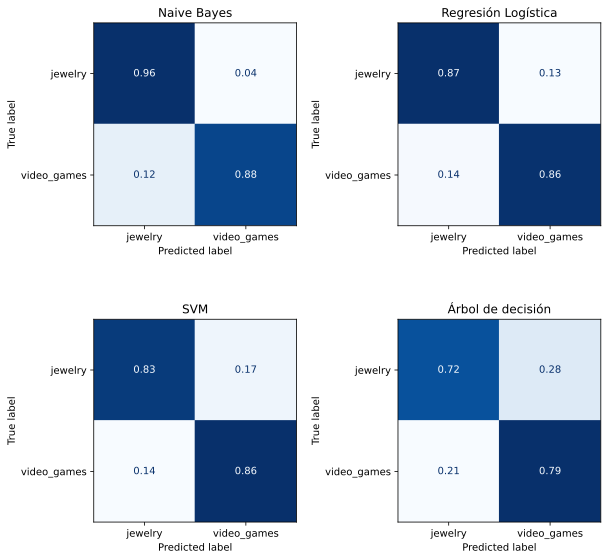

In [11]:
confusion_matrix(y_test, y_pred_nb)
%config InlineBackend.figure_format = 'svg'

fig = plt.figure(figsize=(10,10))

ax1 = fig.add_subplot(2,2,1)
plot_confusion_matrix(nb, X_test, y_test, cmap="Blues", ax=ax1, normalize='true').im_.colorbar.remove()
plt.title("Naive Bayes")

ax2 = fig.add_subplot(2,2,2)
plot_confusion_matrix(logreg, X_test, y_test, cmap = 'Blues', ax=ax2, normalize='true').im_.colorbar.remove()
plt.title("Regresión Logística")

ax3 = fig.add_subplot(2,2,3)
plot_confusion_matrix(svm, X_test, y_test, cmap = 'Blues', ax=ax3, normalize='true').im_.colorbar.remove() 
plt.title("SVM");

ax4 = fig.add_subplot(2,2,4)
plot_confusion_matrix(dt, X_test, y_test, cmap = 'Blues', ax=ax4, normalize='true').im_.colorbar.remove() 
plt.title("Árbol de decisión");

Text(0.5, 1.0, 'Regresión Logística')

<Figure size 1080x1080 with 0 Axes>

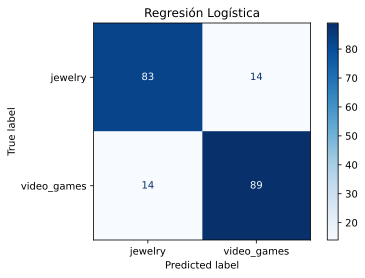

###  `[12 pts]` Punto 5: Términos más importantes de cada categoría

### `[2 pts]` Punto 6: Pregunta

- ¿Qué interpretación y/o conclusiones saca de su modelo?